In [1]:
import numpy as np
import matplotlib.pyplot as plt

from snowScatt import refractiveIndex as ref

from readARMdb import openScatteringRed
from radar import ZeARM
from radar import kdpARM
from PSDqN import PSDGamma3
from PSDqN import _loglog_interp

from readARMdb import InterpScattering
from readARMdb import wlDict

#####################################################################################
# Prep work                      ####################################################
#####################################################################################

wlX = wlDict['X']
K2X = ref.utilities.K2(ref.water.eps(273.15, 299792458000./wlX))
coeffZX = wlX**4 / (np.pi**5 * K2X)

wlKa = wlDict['Ka']
K2Ka = ref.utilities.K2(ref.water.eps(273.15, 299792458000./wlKa))
coeffZKa = wlKa**4 / (np.pi**5 * K2Ka)

wlW = wlDict['W']
K2W = ref.utilities.K2(ref.water.eps(273.15, 299792458000./wlW))
coeffZW = wlW**4 / (np.pi**5 * K2W)

coeffPX = 1e-3 * (180.0/np.pi) * wlX
coeffPKa = 1e-3 * (180.0/np.pi) * wlKa
coeffPW = 1e-3 * (180.0/np.pi) * wlW


def dB(x):
    return 10.0*np.log10(x)

#####################################################################################
# Load scattering tables         ####################################################
#####################################################################################

subtype_agg = 'HD-P1d'
thick_ratio_den = 1.0
slanted_elev = None

# polarimetric 3f 30deg elevation
agg_polX = openScatteringRed('aggregates', subtype='HD-P1d', band='X', elevation=slanted_elev)
den_polX = openScatteringRed('dendrites', thick_ratio=1.0, band='X', elevation=slanted_elev)
agg_polKa = openScatteringRed('aggregates', subtype='HD-P1d', band='Ka', elevation=slanted_elev)
den_polKa = openScatteringRed('dendrites', thick_ratio=1.0, band='Ka', elevation=slanted_elev)
agg_polW = openScatteringRed('aggregates', subtype='HD-P1d', band='W', elevation=slanted_elev)
den_polW = openScatteringRed('dendrites', thick_ratio=1.0, band='W', elevation=slanted_elev)

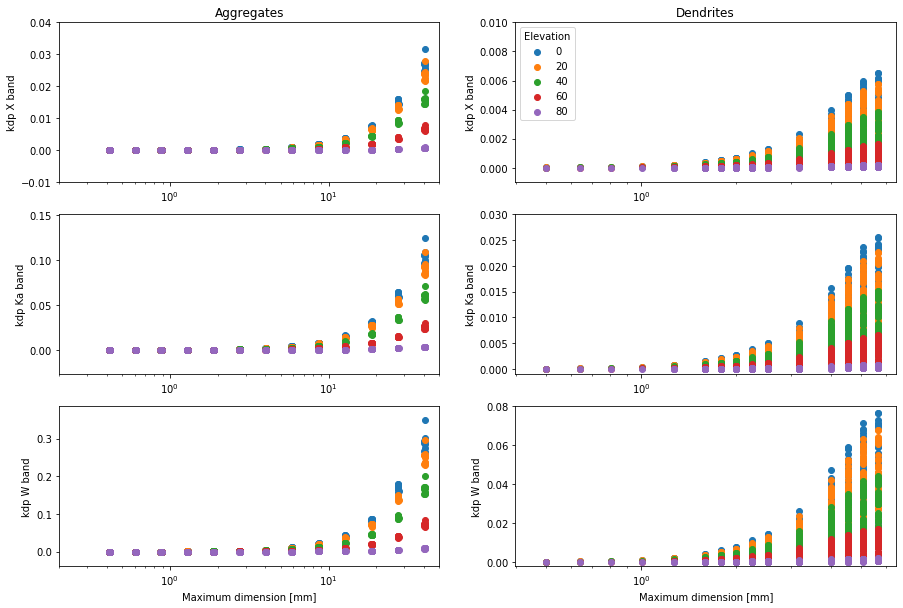

In [39]:
elevs = np.arange(0, 100, 20)
fig, axs = plt.subplots(3, 2, figsize=(15, 10))
for ie, el in enumerate(elevs):
    aggX = agg_polX.sel(incident_polar_angle=90-el).squeeze()
    denX = den_polX.sel(incident_polar_angle=90-el).squeeze()
    aggKa = agg_polKa.sel(incident_polar_angle=90-el).squeeze()
    denKa = den_polKa.sel(incident_polar_angle=90-el).squeeze()
    aggW = agg_polW.sel(incident_polar_angle=90-el).squeeze()
    denW = den_polW.sel(incident_polar_angle=90-el).squeeze()
    axs[0, 0].scatter(aggX.maximum_dimension, coeffPX*(aggX.Shh_forward_real-aggX.Svv_forward_real), label=el)
    axs[0, 1].scatter(denX.maximum_dimension, coeffPX*(denX.Shh_forward_real-denX.Svv_forward_real), label=el)
    axs[1, 0].scatter(aggKa.maximum_dimension, coeffPKa*(aggKa.Shh_forward_real-aggKa.Svv_forward_real), label=el)
    axs[1, 1].scatter(denKa.maximum_dimension, coeffPKa*(denKa.Shh_forward_real-denKa.Svv_forward_real), label=el)
    axs[2, 0].scatter(aggW.maximum_dimension, coeffPW*(aggW.Shh_forward_real-aggW.Svv_forward_real), label=el)
    axs[2, 1].scatter(denW.maximum_dimension, coeffPW*(denW.Shh_forward_real-denW.Svv_forward_real), label=el)
for ax in axs.flatten():
    ax.set_xscale('log')
for ax in axs[:, 0]:
    ax.set_xlim(0.2, 50)
for ax in axs[0, :]:
    ax.set_ylabel('kdp X band')
for ax in axs[1, :]:
    ax.set_ylabel('kdp Ka band')
for ax in axs[2, :]:
    ax.set_xlabel('Maximum dimension [mm]')
    ax.set_ylabel('kdp W band')
axs[0, 0].set_title('Aggregates')
axs[0, 0].set_ylim(-0.01, 0.04)
axs[0, 1].set_title('Dendrites')
axs[0, 1].set_ylim(-0.001, 0.01)
axs[0, 1].legend(title='Elevation')
#axs[0, 1].set_ylim(-0.001, 0.01)
axs[1, 1].set_ylim(-0.001, 0.03)
#axs[0, 1].set_ylim(-0.001, 0.01)
axs[2, 1].set_ylim(-0.002, 0.08)
fig.savefig('Elevation_dependence_KDP.png')

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])